In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

### Read file

In [94]:
df = pd.read_csv('data/lane_changes/20hz/lane_change_4.csv', sep=';')

### Edit values with faktor and offset

In [95]:
faktor_multiply = 1000000; offset = 10

df['accel_lon']=df['accel_lon'].add(offset)
df['accel_trans']=df['accel_trans'].add(offset)
df['accel_down']=df['accel_down'].add(offset)

df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*faktor_multiply) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*faktor_multiply) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*faktor_multiply) , axis=1)

### Scatter Plots

<Axes: xlabel='accel_lon', ylabel='accel_trans'>

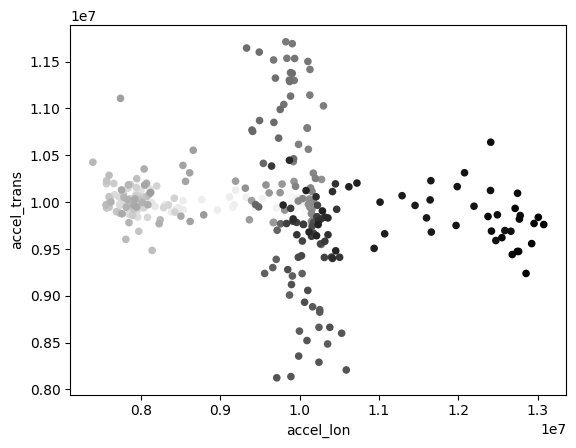

In [96]:
# 2D-plot with timestamp as color gradient
df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

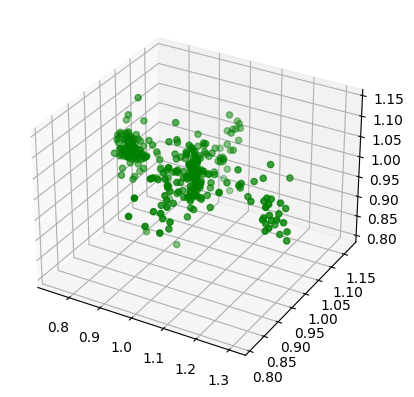

In [97]:
#creating 3D-Plot
ax = plt.axes(projection ="3d")
ax.scatter3D(df['accel_lon'],df['accel_trans'],df['accel_down'], color = "green")

### Hilbert indexing

In [98]:
resolution = 26; dimension = 2
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

points = df[['accel_lon','accel_trans']].to_numpy()

distances = hilbert_curve.distances_from_points(points)

In [99]:
df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)
df_hilbert

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,hilbert
0,57.719094,11.956575,0.173361,9840516,10199874,10260270,1646666871856247,143434236746420
1,57.719094,11.956575,0.175953,10208622,9818998,9635626,1646666871906182,143892739402178
2,57.719094,11.956574,0.171798,9668280,10240964,10436108,1646666871956194,143348203102170
3,57.719094,11.956574,0.173047,10174182,9805605,9617476,1646666872006253,143891179983495
4,57.719094,11.956574,0.168118,9726121,10229109,10376199,1646666872056223,143349221806968
...,...,...,...,...,...,...,...,...
315,57.718797,11.958486,7.789351,13009628,9837412,9142778,1646666887606715,203971239823306
316,57.718796,11.958492,7.638916,13077945,9760195,9432517,1646666887656732,203981251420108
317,57.718795,11.958498,7.490734,12925882,9556586,9818464,1646666887706713,204178287483682
318,57.718793,11.958504,7.350037,12745161,9472765,10207286,1646666887756705,204151961658770


### Hilbert plots

(array([[320.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.],
        [320.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         

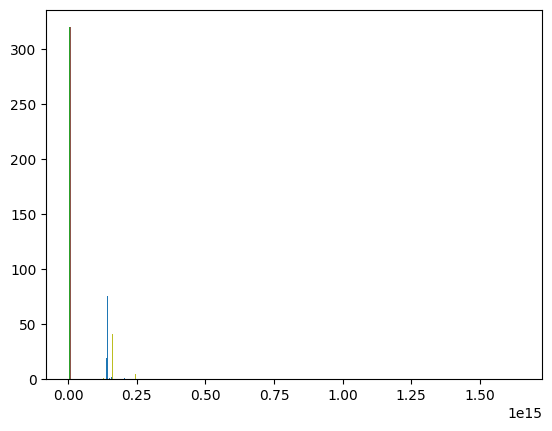

In [109]:
# Original from Lukas code
plt.hist(distances, bins = 100)
# Our change -- currently we do not know what result we obtain
#plt.hist(df_hilbert, bins = 100)

In [106]:
# Code from Younis 'morton' but adapted for hilbert - currently not working
max = 30000000000

plt.hist(df_hilbert['hilbert'], bins=200)
plt.xlim(0,max)
plt.ylim(0,1)
plt.show()

TypeError: list indices must be integers or slices, not str

In [102]:
# these values are from coordinates
max_value = (2**resolution)-1

Q1 = [(int((max_value/2)+0.5), int((max_value/2)+0.5)), (max_value, max_value)] # oben rechts
Q2 = [(0, int((max_value/2)+0.5)), (int((max_value/2)-0.5), max_value)] #oben links
Q3 = [(0, 0), (int((max_value/2)-0.5), int((max_value/2)-0.5))] #unten links
Q4 = [(int((max_value/2)+0.5), 0), (max_value, int((max_value/2)-0.5))] # unten rechts   

In [103]:
#these values are hilbert curve specific
max_value = (2**resolution)-1

Q1 = [(int((max_value/2)+0.5), int((max_value/2)+0.5)), (max_value, int((max_value/2)+0.5))] # oben rechts
Q2 = [(0, int((max_value/2)+0.5)), (int((max_value/2)-0.5), int((max_value/2)+0.5))] #oben links
Q3 = [(0, 0), (0, int((max_value/2)-0.5))] #unten links
Q4 = [(max_value, int((max_value/2)+0.5)), (max_value, 0)] # unten rechts   

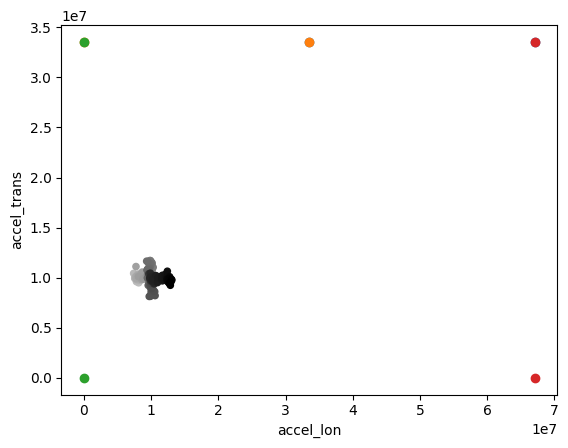

In [104]:
df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])
plt.scatter(*zip(*Q1))
plt.scatter(*zip(*Q2))
plt.scatter(*zip(*Q3))
plt.scatter(*zip(*Q4))